In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiss-hackathon/accident-detection-from-cctv-footage
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test7_1.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test4_14.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test15_18.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test15_27.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test8_23.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test28_14.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test25_5.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test29_18.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test8_24.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident/test4_21.jpg
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Acciden

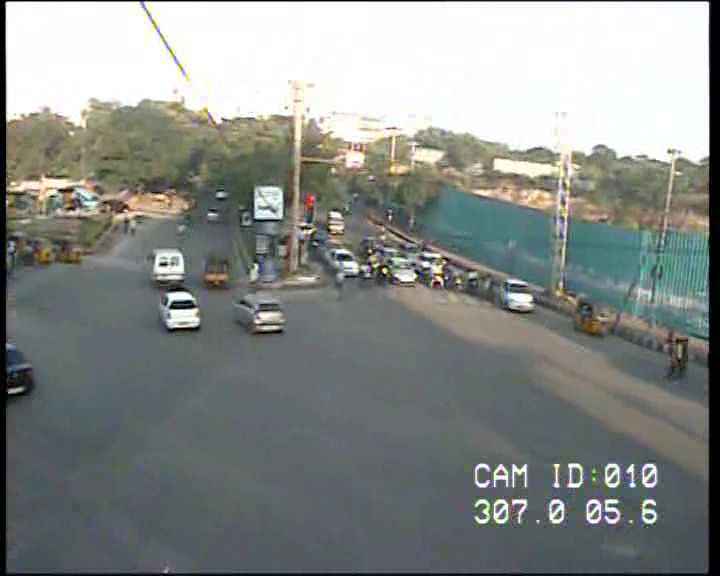

In [2]:
from PIL import Image
from IPython.display import display

img = Image.open('/kaggle/input/accident-detection-from-cctv-footage/data/train/Non Accident/5_10.jpg')
display(img)



from what it looks like there is not much in common between most images,other than maybe that there will be an object involved which can maybe be predicted as a line(person/pole),try to implement a basic CNN first

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-05-12 17:02:02.118504: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 17:02:02.118613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 17:02:02.251036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import os

def count_images(directory):
    # Initialize a dictionary to store the count of images in each subdirectory
    image_count = {}

    # Walk through the directory tree
    for root, dirs, files in os.walk(directory):
        # Initialize count for current directory
        count = 0
        for file in files:
            # Check if the file is an image (you can add more extensions if needed)
            if file.endswith('.jpg'):
                count += 1
        # Store the count for the current directory
        image_count[root] = count
    
    return image_count

# Directory to search for images
 
# Get the count of images in each subdirectory
train_counts = count_images('/kaggle/input/accident-detection-from-cctv-footage/data/train')

# Print the count of images in each subdirectory
for directory, count in train_counts.items():
    print(f"Directory: {directory}, Number of Images: {count}")

    
print('now to check for test')

test_counts = count_images('/kaggle/input/accident-detection-from-cctv-footage/data/test')

# Print the count of images in each subdirectory
for directory, count in test_counts.items():
    print(f"Directory: {directory}, Number of Images: {count}")
    
print('and lastly validation')

val_counts = count_images('/kaggle/input/accident-detection-from-cctv-footage/data/val')
for directory, count in val_counts.items():
    print(f"Directory: {directory}, Number of Images: {count}")

Directory: /kaggle/input/accident-detection-from-cctv-footage/data/train, Number of Images: 0
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/train/Non Accident, Number of Images: 422
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/train/Accident, Number of Images: 369
now to check for test
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/test, Number of Images: 0
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/test/Non Accident, Number of Images: 53
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/test/Accident, Number of Images: 47
and lastly validation
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/val, Number of Images: 0
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident, Number of Images: 52
Directory: /kaggle/input/accident-detection-from-cctv-footage/data/val/Accident, Number of Images: 46


In [5]:
import pathlib
train_dir = '/kaggle/input/accident-detection-from-cctv-footage/data/train'
val_dir = '/kaggle/input/accident-detection-from-cctv-footage/data/val'
test_dir = '/kaggle/input/accident-detection-from-cctv-footage/data/test'
train_dir = pathlib.Path(train_dir)
accidents = list(train_dir.glob('Accident/*'))

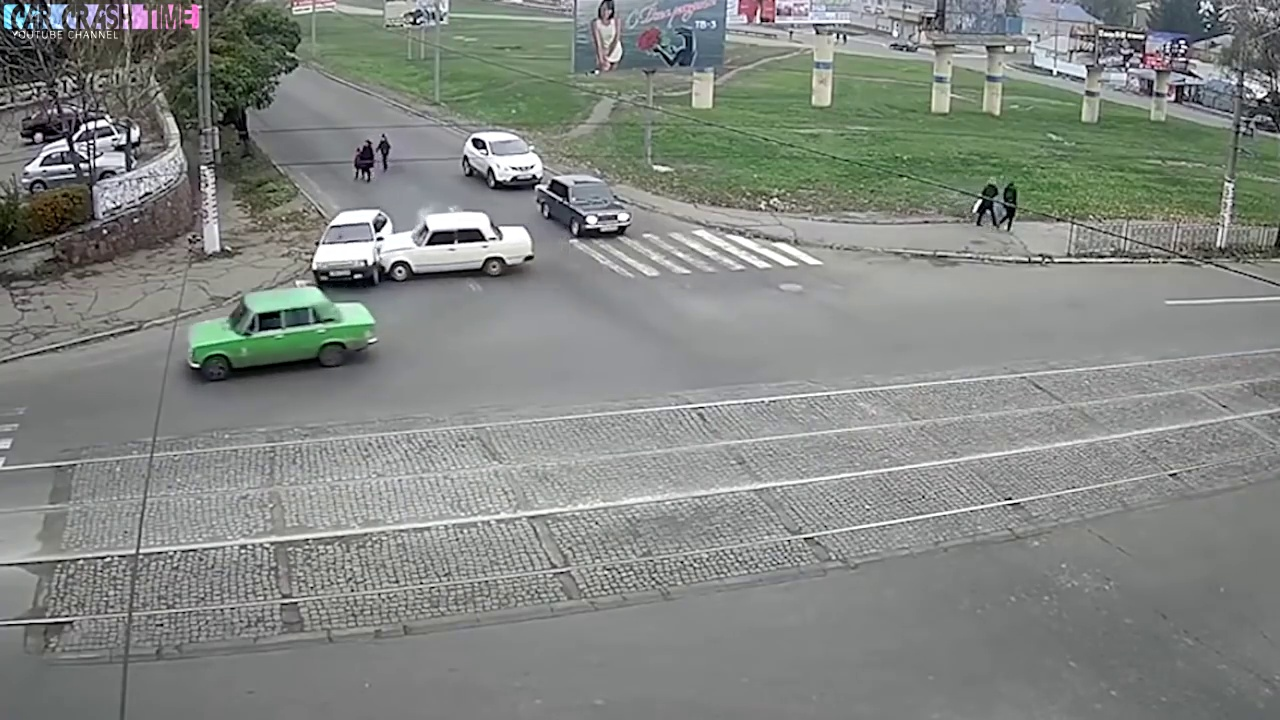

In [6]:
import random
PIL.Image.open(accidents[random.randrange(0,369)])

In [7]:
batch_size = 16
img_height = 180
img_width = 180


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print(class_names)

Found 791 files belonging to 2 classes.
Using 633 files for training.
Found 98 files belonging to 2 classes.
Using 19 files for validation.
['Accident', 'Non Accident']


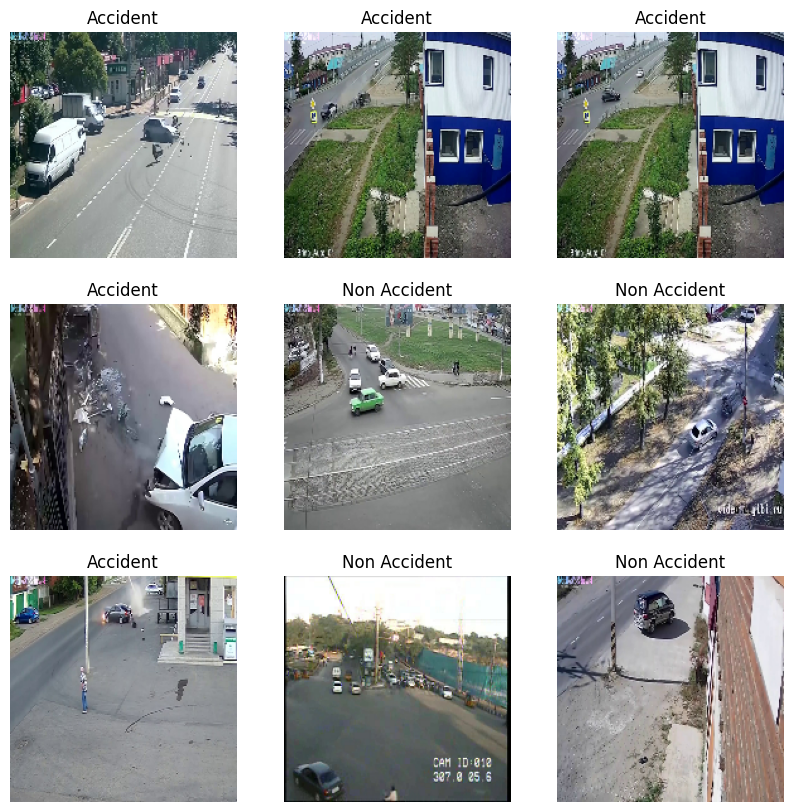

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
# for image_batch, labels_batch in train_ds:
#     print(image_batch.shape)
#     print(labels_batch.shape)
      

In [10]:
from tensorflow.keras import layers, Sequential

normalization_layer = layers.Rescaling(1./255)

num_classes = len(class_names)

model = Sequential([
  normalization_layer,  # Adding the normalization layer here
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Save the model with .h5 extension
model.save("my_model.h5")


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 258ms/step - accuracy: 0.5035 - loss: 1.2045 - val_accuracy: 0.8421 - val_loss: 0.6177
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.5999 - loss: 0.6628 - val_accuracy: 0.8947 - val_loss: 0.5215
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step - accuracy: 0.7127 - loss: 0.5838 - val_accuracy: 0.8947 - val_loss: 0.4375
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.7151 - loss: 0.5611 - val_accuracy: 0.8421 - val_loss: 0.3823
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 246ms/step - accuracy: 0.7281 - loss: 0.5397 - val_accuracy: 1.0000 - val_loss: 0.2939
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 259ms/step - accuracy: 0.7957 - loss: 0.4507 - val_accuracy: 0.7895 - val_loss: 0.4150
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.8553 - loss: 0.3384 - val_accuracy: 1.0000 - val_loss: 0.2656
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.8851 - loss: 0.2998 - val_accu

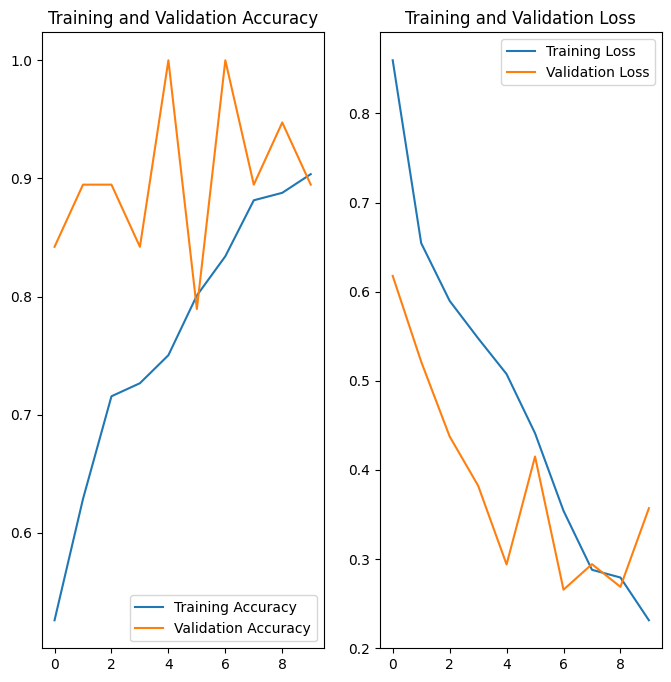

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()